# Derivatives

 Amin Hashemian

## 1. Mathematical definition of a derivative

\\( f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x)}{h}\\)

\\( f'(x)=\lim_{h\rightarrow 0}\frac{f(x)-f(x-h)}{h}\\)

\\( f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x-h)}{2h}\\)

All three definitions are equivalent in case of a continuous function.

## 2. Numerical implementation of first-order derivatives

Forward differences
\\( f'(x_n)\approx\frac{f(x_{n+1})-f(x_n)}{x_{n+1}-x_n}\\)

Backward differences
\\( f'(x)\approx\frac{f(x_n)-f(x_{n-1})}{x_n-x_{n-1}}\\)

Central differences
\\( f'(x)\approx\frac{f(x_{n+1})-f(x_{n-1})}{x_{n+1}-x_{n-1}}\\)

### Example function: \\( f(x)=\sin(x)x-\frac{1}{100}x^3 \\)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f(x):
    return np.sin(x)*x - 1/100*x**3

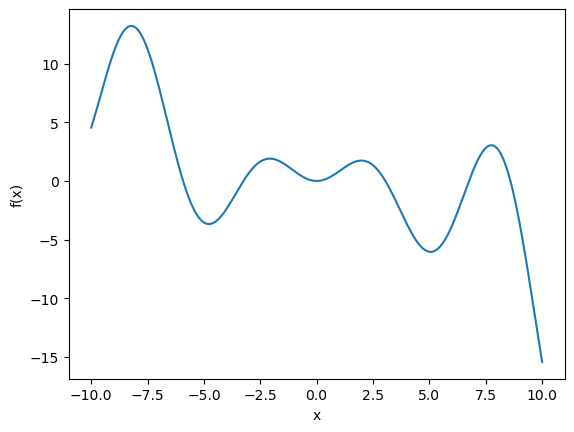

In [4]:
x_list = np.linspace(-10, 10, 201)
y_list = f(x_list)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x_list, y_list)